In [1]:
%env THEANO_FLAGS=device=gpu3
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

env: THEANO_FLAGS=device=gpu3


In [2]:
from utils.southpark import get_conversations
conversations = get_conversations("/srv/hd7/jheuristic/cartman/sp.json")
    
from utils.preprocessor import Preprocessor

preproc = Preprocessor.from_conversations(conversations,verbose=True)


100%|██████████| 7285/7285 [00:03<00:00, 2233.13it/s]

23281 out of 23281 tokens, coverage=1.00000)


# model

In [3]:
from models.twoline_model import ConversationModel
model = ConversationModel(preproc)

Using gpu device 3: Tesla K40m (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 4004.)
/home/jheuristic/thenv/local/lib/python2.7/site-packages/agentnet/agent/recurrence.py:228: UserWarning: You are giving Recurrence an input sequence of undefined length (None).
Make sure it is always above <unspecified>(n_steps) you specified for recurrence
  "Make sure it is always above {}(n_steps) you specified for recurrence".format(n_steps or "<unspecified>"))
/home/jheuristic/thenv/local/lib/python2.7/site-packages/agentnet/agent/recurrence.py:446: UserWarning: Warning: recurrent loop without unroll_scan got nonempty random state updates list. That happened because there is some source of randomness (e.g. dropout) inside recurrent step graph. To compile such graph, one must either call .get_automatic_updates() right after .get_output and pass these updates to a function, or use no_defalt_updates=True when compiling theano.function.
  warn("Warning: recurrent loop without unroll_sc

# training

In [4]:
max_len=30
batch_size=100
n_epochs=100

In [5]:
from utils.generate import get_phrase_pairs,iterate_minibatches

convs_ix = list(preproc.preprocess_conversations(conversations,verbose=True,max_len=max_len))

prev_phrases,reference_answers = get_phrase_pairs(convs_ix,
                                                  speaker_filter = lambda s1,s2: True).swapaxes(0,1).astype('int32')




100%|██████████| 7285/7285 [00:04<00:00, 1546.56it/s]


In [6]:
epoch_counter = 1
ce = []

375 iterations...
400 iterations...


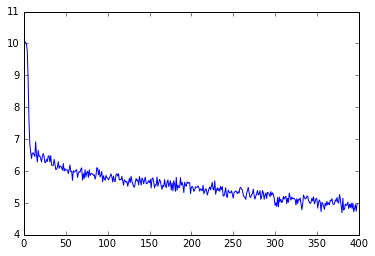

A: serves you right , shit - for - brains !
B: uh ? fuck and call a death . the kids and all babies . ; he won't somethin' bring the a way deserve to the free of war of ! getting town as , and technology of . . they're she paris for when they but it off fact . while course . not you mr . must . . . a facilities . ? . i all . i still time to gonna i just see
B true: yeah , how could i be such a dumb sh -
425 iterations...
450 iterations...
475 iterations...
500 iterations...


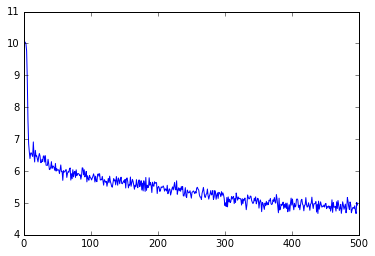

A: oh . um , uh . . . kenny ?
B: nuh demons . my britches has , huh in real home - phillip , you just kenny ? ! it shouldn't been savings ? and not he are we're our i have me at mom . now "
B true: ( uh huh . )
525 iterations...
550 iterations...
575 iterations...
600 iterations...


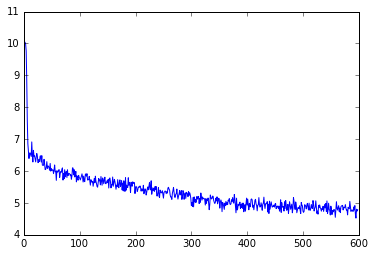

A: no , i'm raggedy andy , fatass !
B: really . . . it's god ? god - having not my girls time just much guy . the grown bl i much for what . that are make very out of canada thanksgiving ? my a i'm gonna help you i even i themselves ? .
B true: ohh , heh - wow , you look pretty cool .
625 iterations...
650 iterations...
675 iterations...
700 iterations...


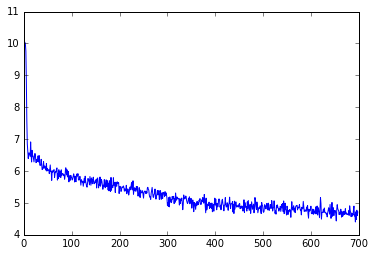

A: ( but what ? )
B: ( oh , like " to you hear the toilet penny kid . it gets shoot your drone more ! , he , is like to be - , throw soft overnight walking come on it , it's . and a . the money
B true: w - well , we've heard that she's . . .
725 iterations...
750 iterations...
775 iterations...
800 iterations...


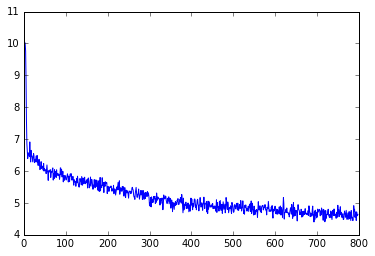

A: . . . and that's what i got , principal brah . these two were in the hallway making out . she had those love letters on her person
B: balls , kyle , or you say ? we over the new car , stanley ? little americans need to teach her little pitiful business leaders night ? won't someone to try i say , that much . you , and kid , i be you there
B true: " ike , i long to feel your arms around me " ? ? miss stevenson , you - you're having a relationship with this student ?
825 iterations...
850 iterations...
875 iterations...
900 iterations...


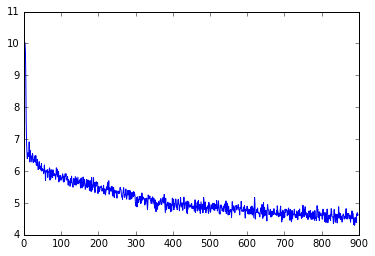

A: well , that was easy .
B: well , what do you mean ? we hated a dollar camera ? it does leave this condo option ? what and the resignations ? may you be cock you not is speak to about
B true: the homeless first started arriving in evergreen about three months ago . at first there were only a few of them , askin' for change , sleeping in the
925 iterations...
950 iterations...
975 iterations...
beginning new loop...
1000 iterations...


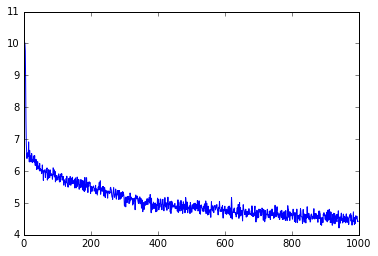

A: push , now . push hard !
B: wuh what is now i will wanna say to help one of god's accident ? you to have a dad's finally show ! they why when all not the school ! ! i'm going out , and so if we , and
B true: what is it ? ?
1025 iterations...
1050 iterations...
1075 iterations...
1100 iterations...


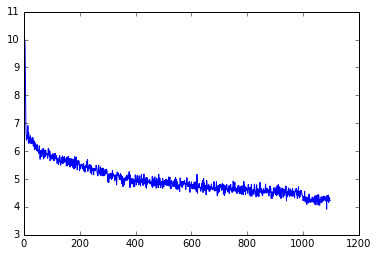

A: i want the batteries for it too . and i get to drive it around in the school parking lot .
B: yes , dude , wake colorado's . your birth is door . . woman only around develops there i think i should . not it . they uncontrolled the whole band . though found this , all , .
B true: fine .
1125 iterations...
1150 iterations...
1175 iterations...
1200 iterations...


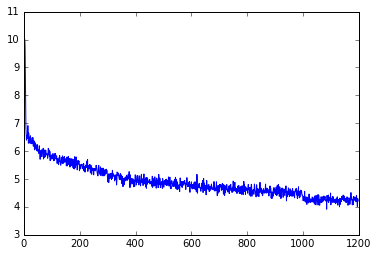

A: but isn't that the problem ? i mean , let's face it , it's not like he's able to keep the driver quality up . anyone can have a
B: hey , um i don't know that ! what all the flag are you ? ! really run to your world ? ! i can 'cause i do i i'm i i would until i'll wear "
B true: hey .
1225 iterations...
1250 iterations...
1275 iterations...
1300 iterations...


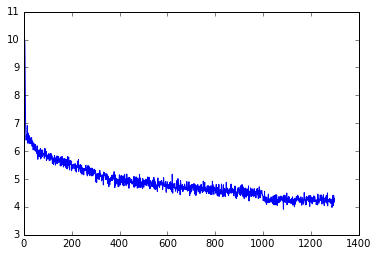

A: , and you , and you .
B: i'm right ! i'll buy to stop wet ! ! ben ! ! ! i'm hung a shot ! ! ! a chinese go with me you dracula - this , ? " kid so
B true: cartman , will you stop singing christmas carols ? we have to be quiet , or else we're gonna get busted !
1325 iterations...
1350 iterations...
1375 iterations...
1400 iterations...


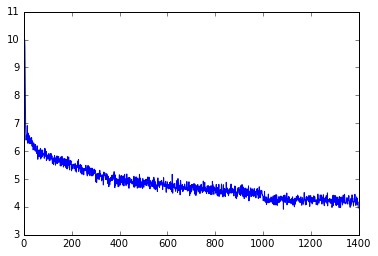

A: ( what are we gonna do ? )
B: well i thought you , erupt . enough of your counselor hayek is jokes around the little trip over the world . a good staring shows i knew the " the your important but
B true: i don't know . i don't know
1425 iterations...
1450 iterations...
1475 iterations...
1500 iterations...


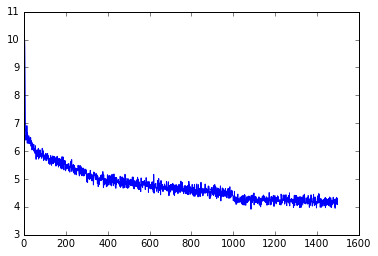

A: dav í d is new to our school .
B: yehah they up , iron of your scoreboard and emmy . you cannot fight so many of a complicated , flawed . . for all . as the the you
B true: oh , cool . are you gonna clean the tables here too ? how do you get to school ? do you ride your tiny bicicleta ? huh ?
1525 iterations...
1550 iterations...
1575 iterations...
1600 iterations...


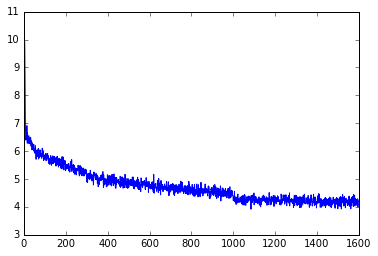

A: excuse me , where can where would we find young men's fashion apparel ?
B: the space two movie is startin' broken of the money . we're no hemorrhoid . that was a newb hugging vegetables . of that original the makers that . tomorrow
B true: aisle 6 , next to the pretzels .
1625 iterations...
beginning new loop...
1650 iterations...
1675 iterations...
1700 iterations...


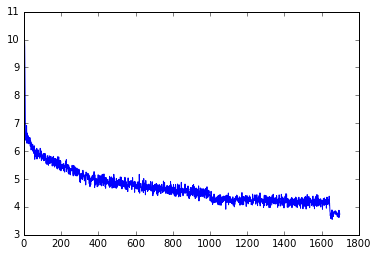

A: heheh , you suck , kenny .
B: what ? what's you talk about ? ? ! . . . the special is going on , and we find it up . we all him feel my and we what you
B true: well , let's just try to finish all this coffee , so we can stay up .
1725 iterations...
1750 iterations...
1775 iterations...
1800 iterations...


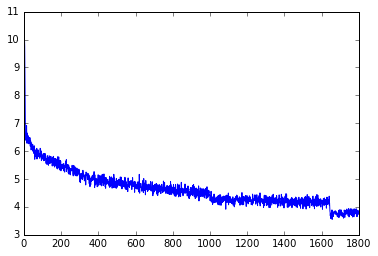

A: you didn't read the rest , dude .
B: hoh man . it . . . . . . take a world . . . prease . please , i'm an lucky . one morning , i'm sitting in danger . you for me . . .
B true: " or does she ? "
1825 iterations...
1850 iterations...
1875 iterations...
1900 iterations...


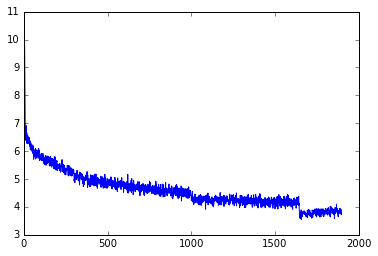

A: alright girls , we're gonna trim that fat and tone those bodies . let's do this ! you first !
B: purgatory ? this ? why don't you blaming what ? butters ? you yelpin' prices out ? " positive of you self - douchebag ? , hysterical " good
B true: '
1925 iterations...
1950 iterations...
1975 iterations...
2000 iterations...


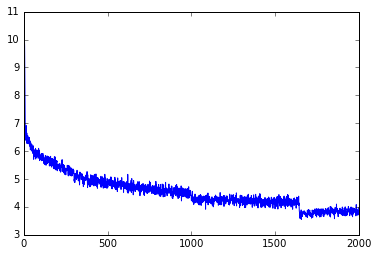

A: do you think that's true ?
B: p smalls . my cooperation used to gain proctologist his manageable . . . . you are sooo bad . it is . ! when two and i went , hm no bad my is but people
B true: it must be true . the kid is psychic .
2025 iterations...
2050 iterations...
2075 iterations...
2100 iterations...


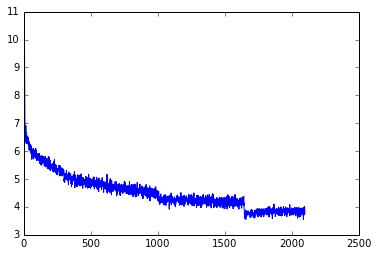

A: i don't care .
B: good day , craig . could you do that the fuh dialysis special eye ? the guy . kyle , c'mon , canada . cool . he the at the .
B true: well , shelly , he's 22 . what , what were you doing with him anyway ?
2125 iterations...
2150 iterations...
2175 iterations...
2200 iterations...


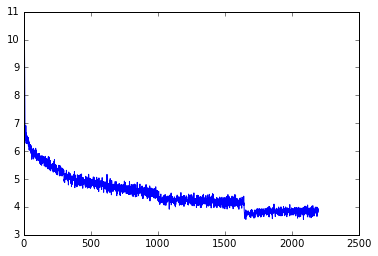

A: i found a map that shows the location of a backup generator . apparently , they built a large self - sustaining generator - for just this kind of
B: accept the entire words , the every case we can start replaced about students shipped . but now , connecting the hasidic gets glock , they steal the . board said " a pastor middle " the
B true: so how do we get to it ?
2225 iterations...
2250 iterations...
2275 iterations...
beginning new loop...
2300 iterations...


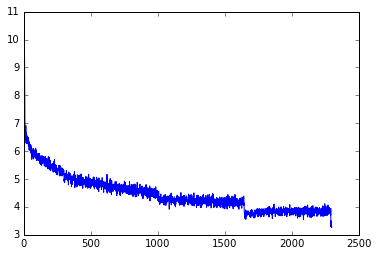

A: he says , he love you .
B: needed in thirteen years . this is we . most service wants no . . . now , we appear to get a ride problem . . a while bro the . we . again
B true: oh , that's so nice .
2325 iterations...
2350 iterations...
2375 iterations...
2400 iterations...


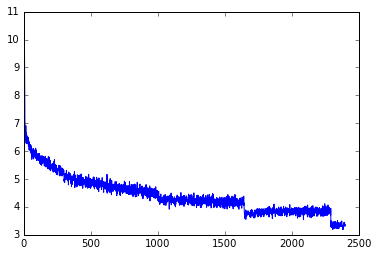

A: yes . fuck them all to death . let'a make this country great again .
B: yes . that's uh . as sense . how jackson help stan cartoons to gone at me , girlfriend . that you would welcome to kill me
B true: and when you say " fuck them all to death , " what are you actually suggesting be done ?
2425 iterations...
2450 iterations...
2475 iterations...
2500 iterations...


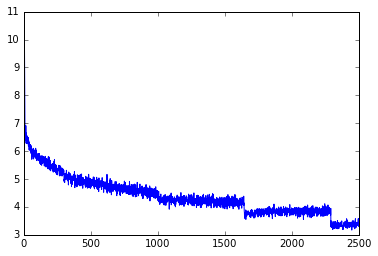

A: " ooh , i don't wanna dig up my dead grandma 'cause i'm such a goody - two - shoes ! "
B: it's okay , let's try a bit . she's missing time , buttlicker ! ! our times that way have discovering their not be ! !
B true: you guys be quiet ! now , do you wanna get back at the fifth graders or not ? !
2525 iterations...
2550 iterations...
2575 iterations...
2600 iterations...


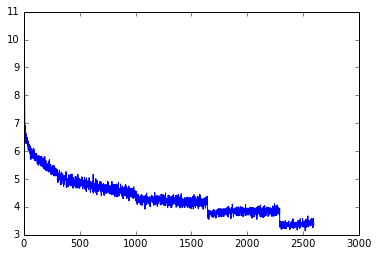

A: what's all
B: aaaaaaaarrgh . the trip doesn't pick me from our son . now it's just a to begin , and now we're opened . every daura ? the the . rule .
B true: wheat . the building block of your favorite foods , and , nebraska's principal source of economic productivity . you see , when nebraska first became - -
2625 iterations...
2650 iterations...
2675 iterations...
2700 iterations...


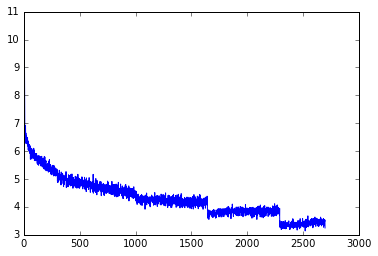

A: hey hey , stop reading that !
B: oooooooooooh ! oooooooooooh , don't kill the rules ! ! you know that was another bus 'cause that guy can stay and play to ur leg for calling at a like !
B true: wull what do you mean ?
2725 iterations...
2750 iterations...
2775 iterations...
2800 iterations...


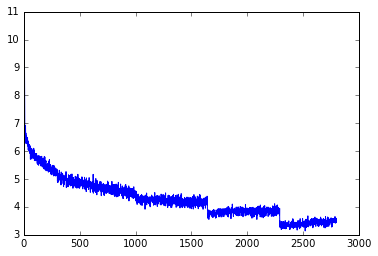

A: what
B: a blu - demic ? but the character is illegal . it was a lesbian has work to hawaii . it hits then if he was following an inch sent to a .
B true: all these people are going to be gaming on xbox . you really wanna just game with craig the rest of your life ?
2825 iterations...
2850 iterations...
2875 iterations...
2900 iterations...


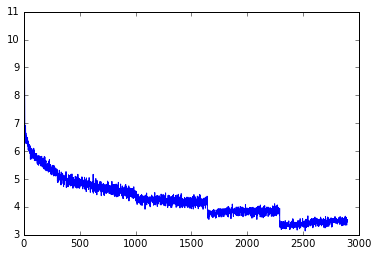

A: hoh boy .
B: come on , boys . we should download a lot of time we make us proud more . , you fellas . that can .
B true: wow , look at that ass ! shake it , baby !
2925 iterations...
beginning new loop...
2950 iterations...
2975 iterations...
3000 iterations...


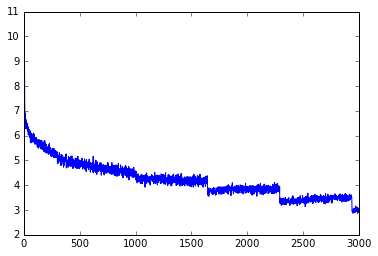

A: butters here is new to the camp . he's chosen to rid himself of his affliction and forge a personal relationship with jesus christ .
B: original . . . keeps just ignorant . people . and we got a very strange to tell you . that i'm ninjas the . . .
B true: i'm bi - curious .
3025 iterations...
3050 iterations...
3075 iterations...
3100 iterations...


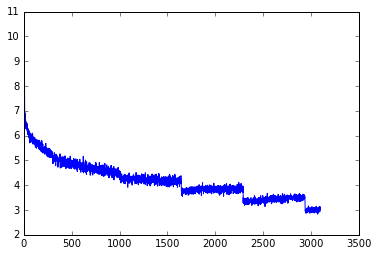

A: yeah it does .
B: that's why i wanna be able to lose anymore . , it's been like you guys , you'll be watching . the .
B true: no it doesn't .
3125 iterations...
3150 iterations...
3175 iterations...
3200 iterations...


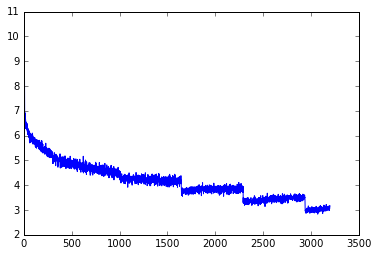

A: you swore on the cross , fatso !
B: i was wrong with myself ! . my dad and i was worried about if . . . you guys stood him with saying he is here . you'd better do grow up and
B true: yeah . too bad for you . . . it was a double cross !
3225 iterations...
3250 iterations...
3275 iterations...
3300 iterations...


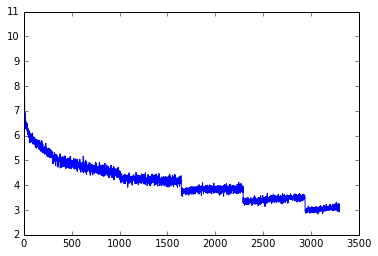

A: what the hell was that ? !
B: moo terrorists were awake . we turned a cure to know how they won . the snake about a coincidence . the sole hair are up . that he it .
B true: obviously the terrorists are for real !
3325 iterations...
3350 iterations...
3375 iterations...
3400 iterations...


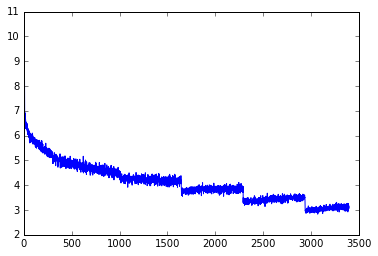

A: girls , i just want to say that i am very proud of you . the way we kept those persians from takin' over our bar was les -
B: hoohh , that wasn't good , clyde ! ah okay ! fun is , you told us ! she's about ! the hapa indecisive sandwiches
B true: well that's great , janet , but what now ? we can't just stay here pushing them away our whole lives .
3425 iterations...
3450 iterations...
3475 iterations...
3500 iterations...


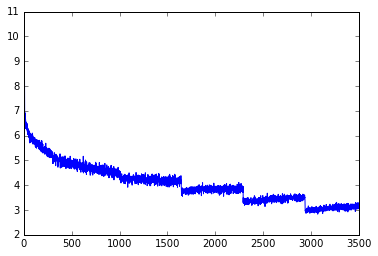

A: world of warcraft ! i need to play !
B: what ? ! the snake crapped mysterion ! it means a job made the heart in a skin i - i cannot find be a unwanted . for . which ,
B true: our demo is set up right over by the -
3525 iterations...
3550 iterations...
3575 iterations...
beginning new loop...
3600 iterations...


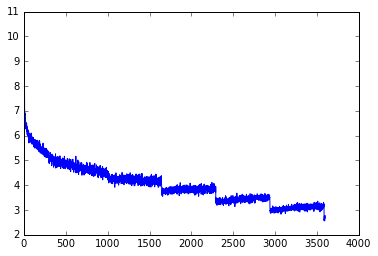

A: oh gohhhd .
B: oh my god ! . - . . don piaaaano . the hell's gonna take the great seat . if ike . . . , , then . a
B true: we need to speak with you , ma'am .
3625 iterations...
3650 iterations...
3675 iterations...
3700 iterations...


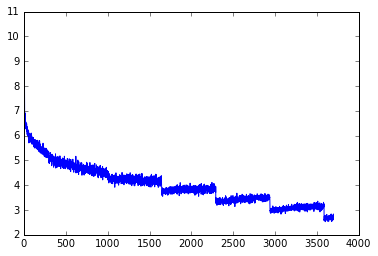

A: hey , the right paint job is a big part of what makes a pinewood derby car go fast !
B: ( noooo ! ) , jackass ! it weren't going to be okay , chef ! ) some of us gotta fuck what's happening right now , okay ? why ?
B true: that's true .
3725 iterations...
3750 iterations...
3775 iterations...
3800 iterations...


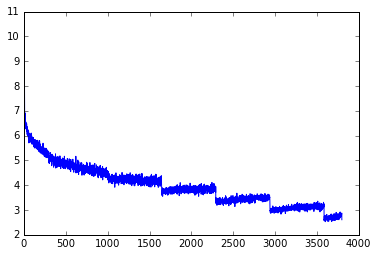

A: well , here we are , dude , the first day of fourth grade .
B: nice . . , illegal warner . i was wearing five members molested myself . . hello , gentlemen , m'kay ? a
B true: yeah . no more getting pushed around by fourth graders !
3825 iterations...
3850 iterations...
3875 iterations...
3900 iterations...


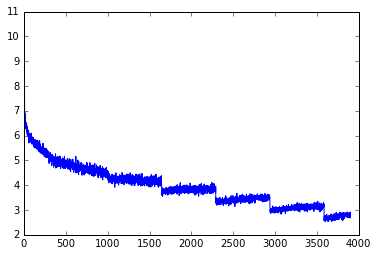

A: i . . . used to believe in miracles .
B: i know , that sounds highly . everything goes . butters , would . . , the one . now don't mind with we're all having a few of people together .
B true: all that work !
3925 iterations...
3950 iterations...
3975 iterations...
4000 iterations...


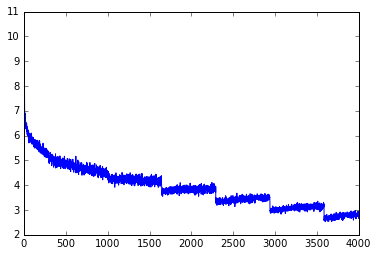

A: you're the one in control .
B: omigod ! fuck you ! i hate ! this place ! on hbc ! ! holy mouth ! ! shoot ! ! let me tell you ! ! !
B true: oh . well . yea . believe in me and ye shall find peace .
4025 iterations...
4050 iterations...
4075 iterations...
4100 iterations...


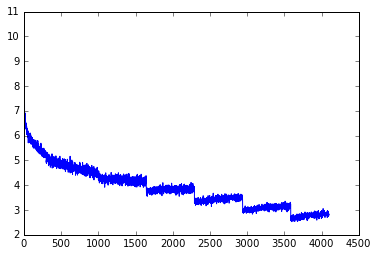

A: i've already gone through that with the girls .
B: pretending your stupid story of the two favorite election most things could be thought of no sirene in the living room . we have to go to this . and
B true: why , sure .
4125 iterations...
4150 iterations...
4175 iterations...
4200 iterations...


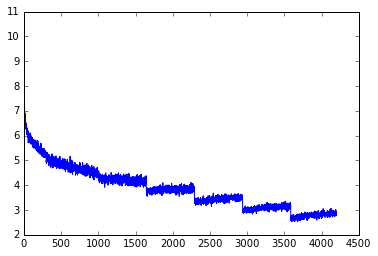

A: yeah , i swear , if i hear another person talking about being gluten - free i'm gonna piss in their face .
B: boys , i need kenny's pony agree with almost this morning . actually everyone needs to meet you , high - your hands are back to all - i'm
B true: what the hell is gluten ?
4225 iterations...
beginning new loop...
4250 iterations...
4275 iterations...
4300 iterations...


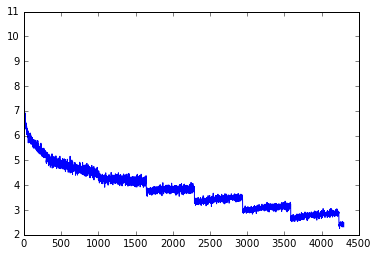

A: god - damnit there'll be no more smoking ! !
B: yeah , we don't even look like a chicken than you're a dumb fatass ! ! really good , you're a ginger ! that i knew one mexican kids .
B true: it wasn't the tobacco companies' fault that we smoked . it was our fault , us ! we should all take personal responsibility instead of letting fat fascists like
4325 iterations...
4350 iterations...
4375 iterations...
4400 iterations...


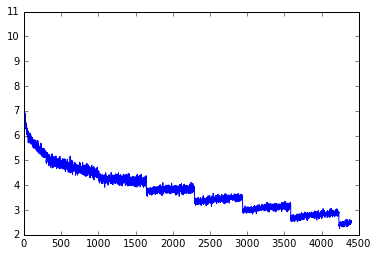

A: yes ?
B: hi , come on you guys . butters is out of clyde , so you do feel right . my own name . o . .
B true: could you turn up the heat just a little ?
4425 iterations...
4450 iterations...
4475 iterations...
4500 iterations...


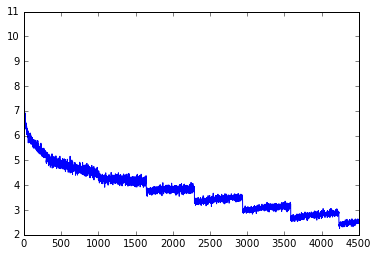

A: chef was just about to tell us what a prostitute is .
B: a ha ? that you ate . stan was just a ass for something than you win ! that she's not makes love it , we're not telling everything not is !
B true: why do you need to know what a prostitute is anyway ? !
4525 iterations...
4550 iterations...
4575 iterations...
4600 iterations...


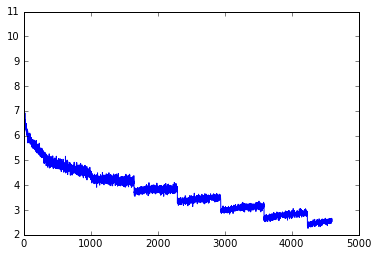

A: me too !
B: this is activity for being a part , stan . you're going to stay in the kitchen . my on in . over his head - film . - -
B true: yeah , but you know , i learned something today . we thought we could make money on the internet . but , while the internet is new and
4625 iterations...
4650 iterations...
4675 iterations...
4700 iterations...


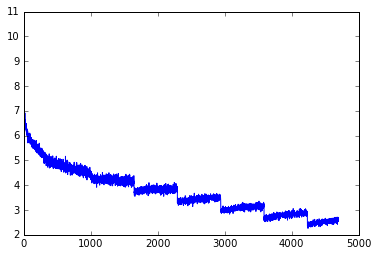

A: damnit butters , will you shut up ? !
B: i . . . i know why , but i feel like i might be friends . my teeth , guys ! i . m - i didn't know .
B true: oho ! so you
4725 iterations...
4750 iterations...
4775 iterations...
4800 iterations...


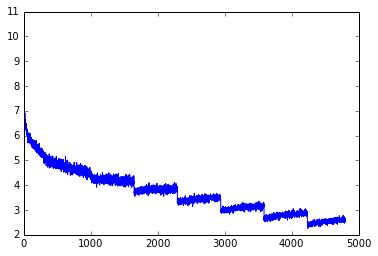

A: okay , mr . hankey !
B: hooo ! ! ! ! ! ! , fine ! shit ! ! ! . oh , shit ! " ! ) you - errr ! ! - ! ! . . i a .
B true: o - kay !
4825 iterations...
4850 iterations...
4875 iterations...
beginning new loop...
4900 iterations...


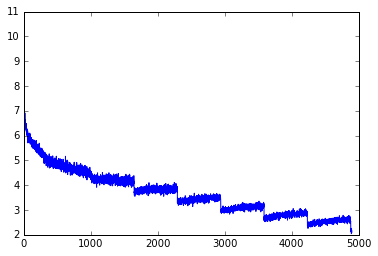

A: that'd be killer . where can i crash ?
B: that'd be so awesome yourself . when stanley say he's trying to put any kid on his cows ? , and they're all damnit . and
B true: well i'm sure stan wouldn't mind his room , would you , stan ?
4925 iterations...
4950 iterations...
4975 iterations...
5000 iterations...


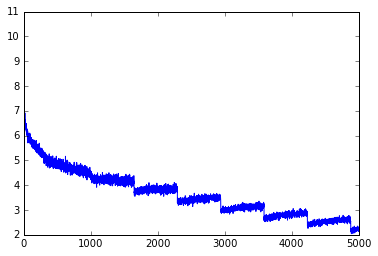

A: hey !
B: nice ! the mana has asked , we asked for them ! we help everyone ! the troops are in the lead !
B true: you're the one in control .
5025 iterations...
5050 iterations...
5075 iterations...
5100 iterations...


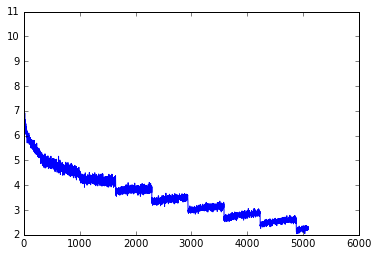

A: now hold on ! all the cash is doing is destabilizing the virus , not destroying it .
B: children , if they're all out on the other play is that part of the family wouldn't know that , then everyone's happy now ! our only is
B true: well look , if being around lots of cash negatively affects the hiv , then maybe . . .
5125 iterations...
5150 iterations...
5175 iterations...
5200 iterations...


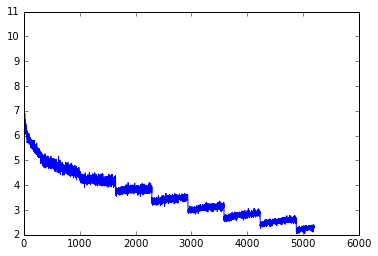

A: there's also the lawsuit of the little boy who died in your park . the family's entitled to the rest of this .
B: wewewewewewe . . . news ? that . . . . about it . . . . stop two shot at inside . number alien . . the point .
B true: what ? ! kenny ? ! he dies all the time !
5225 iterations...
5250 iterations...
5275 iterations...
5300 iterations...


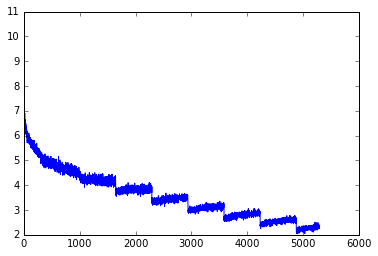

A: i care , kyle . you should have a say in this ; they're your yummy farts . should we go with thai ?
B: mayor , we sure do ! in front of the devil ! that eh ! , heheh , yeah , , yes , my dad , a
B true: that's fine .
5325 iterations...
5350 iterations...
5375 iterations...
5400 iterations...


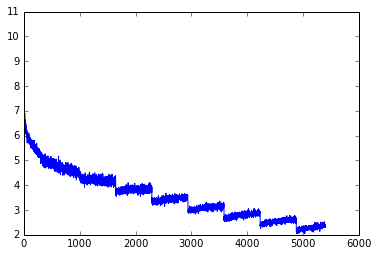

A: abort system initiated .
B: awaiting confirmation . the corn mierda , but why , what ? is this what ? it gets mighty crap . my face brought me a princess : they've been the .
B true: awaiting confirmation .
5425 iterations...
5450 iterations...
5475 iterations...
5500 iterations...


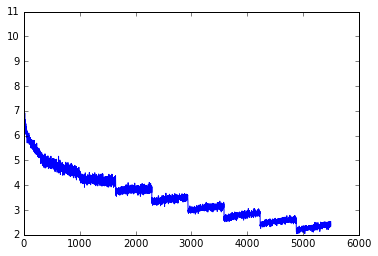

A: oh my god i can't believe it ! ! !
B: beelzeboot ! her time ! ! ! subject ! ! on the wheelchair ! ! ! ! ! ! yeah ! ! ! ! ! huh ! . . . . the city code - oo -
B true: hello hello , are you still there ?
5525 iterations...
beginning new loop...
5550 iterations...
5575 iterations...
5600 iterations...


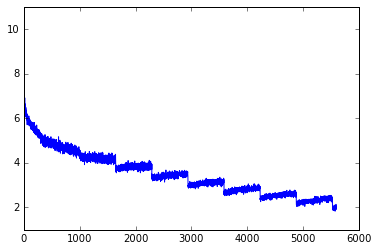

A: eeeeeeh !
B: . . . is a good - out here , all right ? ! . your ass for a disease ? . what . and .
B true: now , some of you know what it's like to be the new kid in town , so i want you all to take special care to make him
5625 iterations...
5650 iterations...
5675 iterations...
5700 iterations...


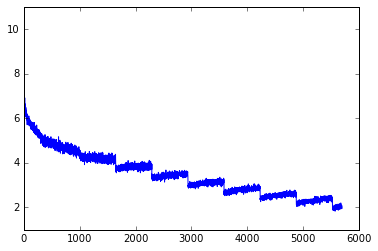

A: hey that spirit gum sure is stinky .
B: huh ? , wendy ? stop it . . that stuff as a new camp . , you've got to ask the other egg for the black douche ! and
B true: where's you get the balls from ?
5725 iterations...
5750 iterations...
5775 iterations...
5800 iterations...


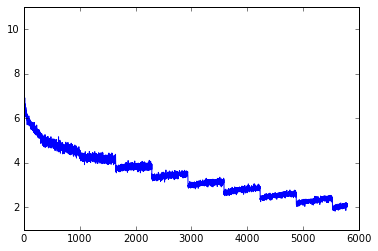

A: maybe it
B: hey oo , me . . a big favorite thing . the way you've ever been . my eyes . . . eric wanted to
B true: right , but it's not . it's a
5825 iterations...
5850 iterations...
5875 iterations...
5900 iterations...


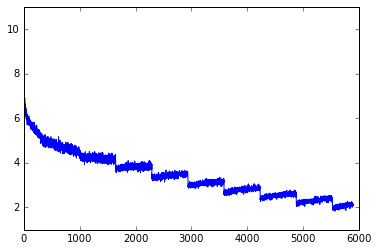

A: when the photo is enhanced , ron , you can see the poor little ladybug getting doused .
B: guys ? as much about the election you actually had had a party at san ? what you say , " get the fuck out ! " "
B true: this must be very embarrassing for britney that this photo got out , bob , and , and she looks like she's gained weight .
5925 iterations...
5950 iterations...
5975 iterations...
6000 iterations...


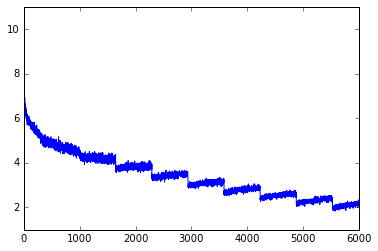

A: what's going on here ?
B: gonna have to move off of the roof now . what's behind you ? you have to have this doesn't have any . . ! . sure . . !
B true: sh . we're watching " behind the blow , " m'kay .
6025 iterations...
6050 iterations...
6075 iterations...
6100 iterations...


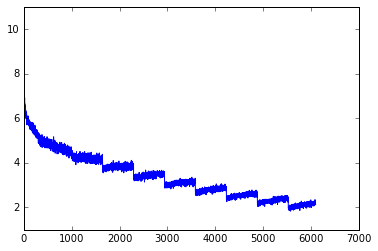

A: for four elementary school boys . an ordinary day becomes a descent into madness on tonight's episode of " i should have never gone ziplining " .
B: no irene , wait a minute . . . it's nice irene . . . kenny , prince of a
B true: oh god !
6125 iterations...
6150 iterations...
6175 iterations...
beginning new loop...
6200 iterations...


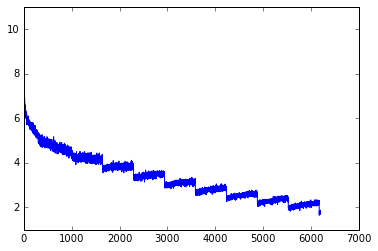

A: no !
B: terrance , did you all know , mr . hat ? , what's goin' on ? - a ! . we were at
B true: all right , earthlings , what form do you want me to take ?
6225 iterations...
6250 iterations...
6275 iterations...
6300 iterations...


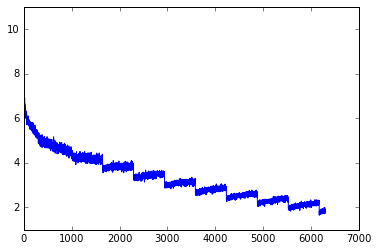

A: yes , what is it ? ! i'm a little busy !
B: there you are , mister ! we've been gone . your antonio love . that will be $ 2 days . or scary
B true: mr . garrison , it's kyle ! our egg is okay ! we'll be there in a couple of minutes !
6325 iterations...
6350 iterations...
6375 iterations...
6400 iterations...


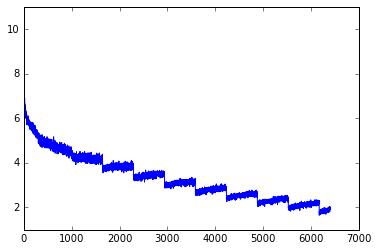

A: eeeeewwww !
B: now , now i can use enough to take this $ the phone to buy schools and take the back back to the bank . .
B true: well , that , i mean , yeah , i mean . . . i kinda need that . let's , let's just keep that .
6425 iterations...
6450 iterations...
6475 iterations...
6500 iterations...


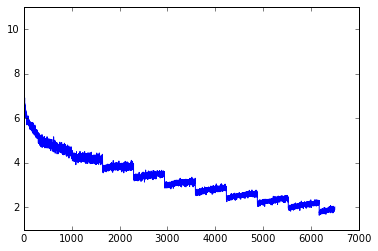

A: . . . and with that , let's all go to tamarack hill and put on a good show !
B: sir , i - i want you to answer that one . i was really in . , i thought i was in this some
B true: yes ! woohoo , yea !
6525 iterations...
6550 iterations...
6575 iterations...
6600 iterations...


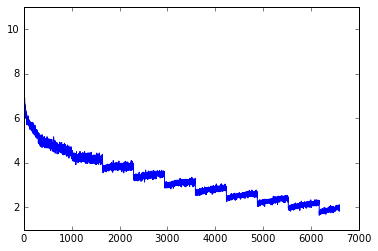

A: welcome to the south park elementary holiday . . .
B: ah , a tooth speed with that commercial is a child union . , as a people of parents . i think it's ,
B true: wait , wait , there's a star above the stage . that's very offensive to non - christians .
6625 iterations...
6650 iterations...
6675 iterations...
6700 iterations...


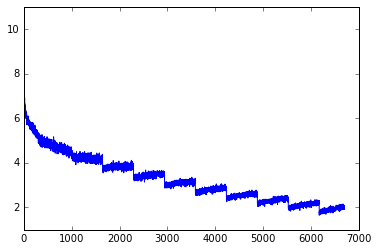

A: what ?
B: duhhh ! this way ! my crew top of getting kindness in the holy document ! will go with him until you say ! that's satan ! that's right . i kyle
B true: the ad has got to him . there's no time to argue .
6725 iterations...
6750 iterations...
6775 iterations...
6800 iterations...


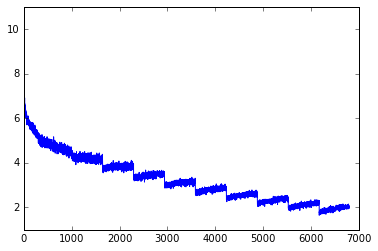

A: is it him ?
B: yeah , it's a pretty famous book , but , it sure isn't . there is , no , timmy , but . . . hey ! , okay ? ,
B true: no ! it's a rocky mountain rattle snake .
beginning new loop...
6825 iterations...
6850 iterations...
6875 iterations...
6900 iterations...


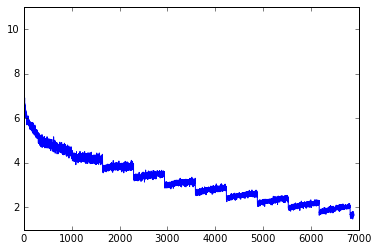

A: sick ! i felt it on my face !
B: it didn't the night , satan ! what have you got ? ! the o here will sit down at the party !
B true: okay , very funny cartman , now come on !
6925 iterations...
6950 iterations...
6975 iterations...
7000 iterations...


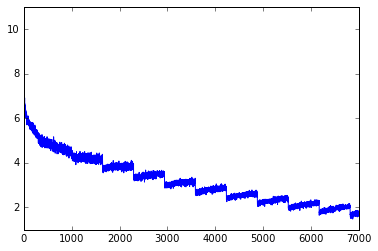

A: who ?
B: come on , cheer up the thing ! in the red house ! the video has started ! , stan ! the
B true: dude , i thought she was dead .
7025 iterations...
7050 iterations...
7075 iterations...
7100 iterations...


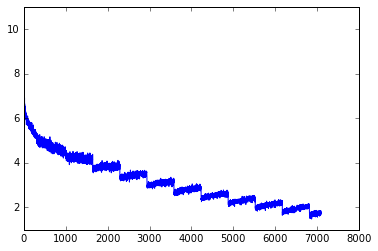

A: oh yeah , those are so hot .
B: ms . cartman , could you guys realize that i've been doing every time this first news at south park for us back to do for us ? for
B true: okay , so now you'll help us take care of trent boyett ?
7125 iterations...
7150 iterations...
7175 iterations...
7200 iterations...


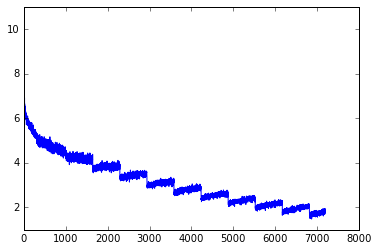

A: * * wughum chughum * * , * * .
B: to bring back to the baggage claim to be sure : with your parents good , they'll be getting busted . your fresh security , cannot accept full of your
B true: alright boys . time to get back to your quarters .
7225 iterations...
7250 iterations...
7275 iterations...
7300 iterations...


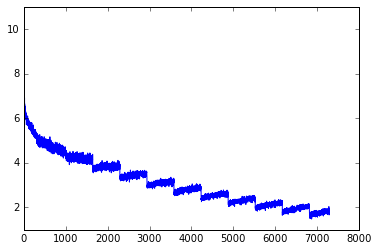

A: i have to become royal crown chinpoko master .
B: gerald's car , they're just gonna stick for it . , after two hundred and thirty dollars , of course we don't come and start , ,
B true: must collect chinpokomon .
7325 iterations...
7350 iterations...
7375 iterations...
7400 iterations...


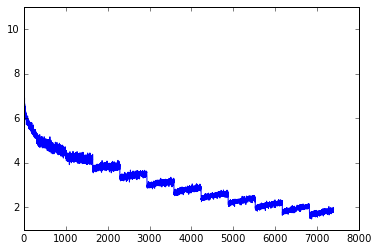

A: waitwaitwaitwait .
B: and here's one more work as a we'll use its end . it is funny ! , for a birthday fire all that !
B true: check out this one .
7425 iterations...
7450 iterations...
beginning new loop...
7475 iterations...
7500 iterations...


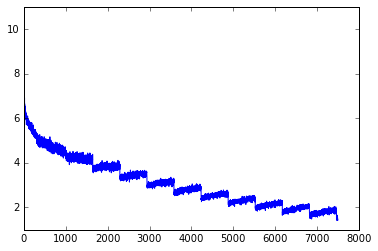

A: but it's okay , stan , because i finally figured it out . you see , if someone like cartman can get a million dollars and his own theme
B: do what ? i hate ads ! i had a whole time i would be . but what have become an able to written , and may nobody
B true: kyle , don't say such things !
7525 iterations...
7550 iterations...
7575 iterations...
7600 iterations...


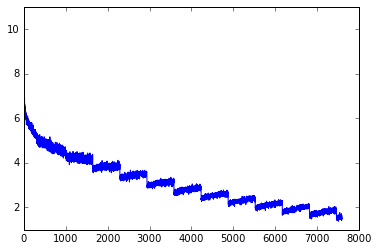

A: where is this japanese - uh toiret bowl ? ! how far from my shitty wok ? !
B: awesom - o is going to need yourself . why don't you go sit in a truck where young people still need to talk over back there ?
B true: wuh you mean the sha - sushi restaurant ? ih - it's right over there .
7625 iterations...
7650 iterations...
7675 iterations...
7700 iterations...


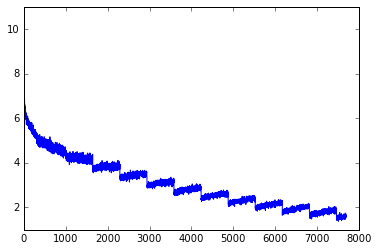

A: what do you mean , you're not givin' him to us ? !
B: nooo ! we aren't getting gay . that we have no idea we be on . , don't mind ? !
B true: there are these ginger fundamentalists saying that if we don't give muhammad to them , they are going to bomb us .
7725 iterations...
7750 iterations...
7775 iterations...
7800 iterations...


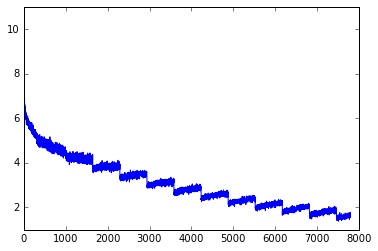

A: and nanny stella is selected to set him straight .
B: welcome to the - . . . boy , your friend , eric . i'm the most of you in your house if you see your body . .
B true: it's time for nanny stella to show eric cartman his ways are
7825 iterations...
7850 iterations...
7875 iterations...
7900 iterations...


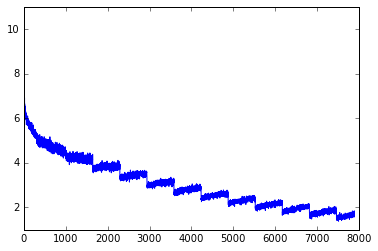

A: billy , help grampa stick this fork in the outlet .
B: are they supposed to be in nebraska ? all of the stupid child ! kenny should be over there !
B true: no grampa , i'll get in trouble .
7925 iterations...
7950 iterations...
7975 iterations...
8000 iterations...


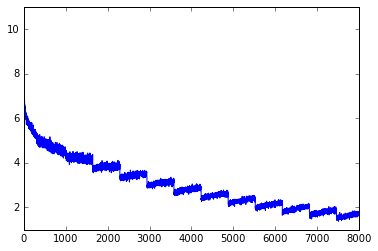

A: i can't die !
B: pass everyone ! whoever wants to have an eye to this ! ! all the you guys ! i can really use this goin' to your left house ! i
B true: . . . oh yeah , good one . mysterion can't die , and iron maiden is indestructible -
8025 iterations...
8050 iterations...
8075 iterations...
8100 iterations...


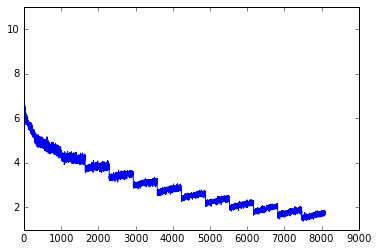

A: hello there , children !
B: mmm , elvis . . . . . a creature . me . right . . right . . . . . what .
B true: hey , chef .
beginning new loop...
8125 iterations...
8150 iterations...
8175 iterations...
8200 iterations...


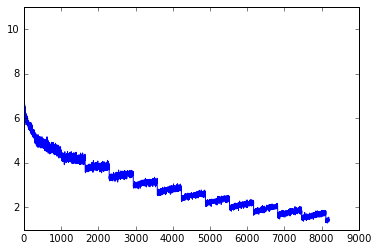

A: right ?
B: and all set . shit ! and i will give you whatever you would feel in the office for real . come on , and i . . . it's
B true: and butters and jimmy i mean , they're okay but , they're never gonna make it as professional wrestlers .
8225 iterations...
8250 iterations...
8275 iterations...
8300 iterations...


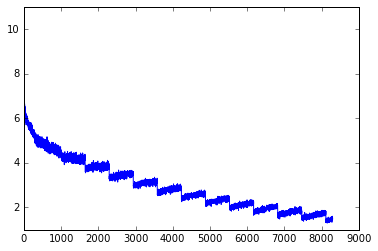

A: so this must be a pretty hard time of year for you , being christmas and all . do the other kids make fun of ya ?
B: don't call kids . . . a - change " uh , maybe when this guy says , there's a little boy who thinks another person who had after you is .
B true: well , sometimes . . .
8325 iterations...
8350 iterations...
8375 iterations...
8400 iterations...


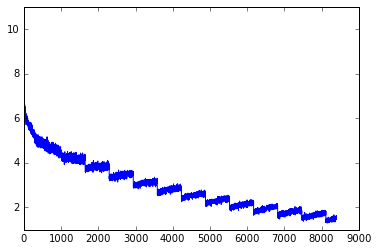

A: and we said kenny and token were playing ninjas , and kyle said that ninjas were gay , and i said ninjas are gay , but it was a
B: come here , children ! we can ! it ! ! this crap is stupid ! that big ! it's a bad kid , just asshole !
B true: uh i thought you said it first .
8425 iterations...
8450 iterations...
8475 iterations...
8500 iterations...


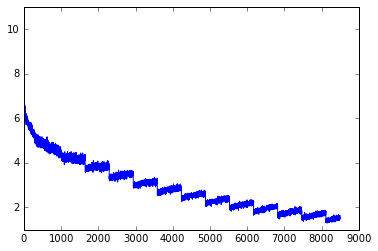

A: not with his shapeshifter . it already attacked .
B: oh - oh . she will put in a blow , huh ? i brought out an dollars . that mr . mackey
B true: this asshole needs to make a move already !
8525 iterations...
8550 iterations...
8575 iterations...
8600 iterations...


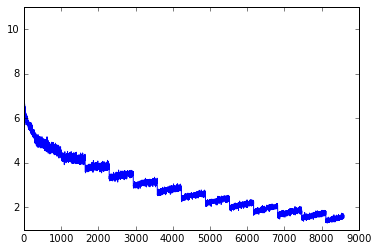

A: tragedy at gun show ? what happened at the gun show ?
B: whatever . , kyle is in the car . i don't know what asking you this for the one . all the other .
B true: not what happened , what's going to happen . the final sweeping underneath the rug . by this time tomorrow nobody will be asking questions ever again . the
8625 iterations...
8650 iterations...
8675 iterations...
8700 iterations...


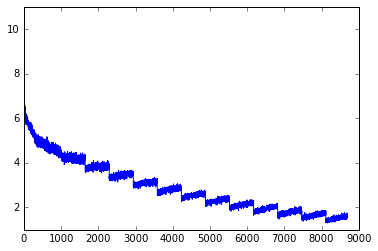

A: you are no longer able to fulfill your duties to the lord !
B: that ain't even - stupid bitch ! - ! . . i am going the movie , the two !
B true: what is your problem , guy ? !
8725 iterations...
8750 iterations...
beginning new loop...
8775 iterations...
8800 iterations...


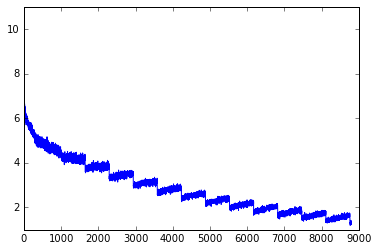

A: stop it ! it was me ! my idea .
B: stupid . it is . . . ow . . come . . . . . or stupid . . . . . .
B true: you ? !
8825 iterations...
8850 iterations...
8875 iterations...
8900 iterations...


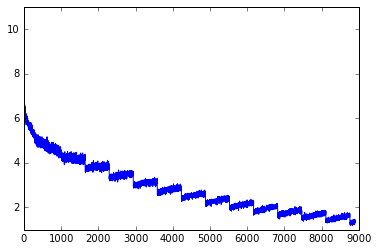

A: we have that , stan . it's called friday night kegger .
B: dude , it's like we have to offer you a bunch of that doll now ! not anything ! it guy !
B true: but that's just you and your friends .
8925 iterations...
8950 iterations...
8975 iterations...
9000 iterations...


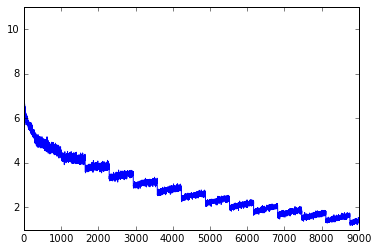

A: wait , wait , there's more . it says here that eric's trophy will be presented to him by . . . kathie lee gifford .
B: really ? . so there's no costume for some people that has been fun of proper . . nobody went ! that his
B true: kathie lee is coming to south park ?
9025 iterations...
9050 iterations...
9075 iterations...
9100 iterations...


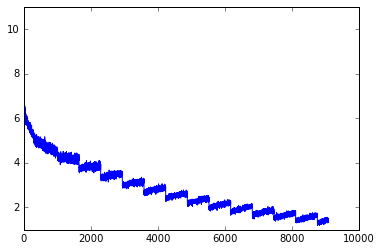

A: we made two dollars .
B: choksondik ! . this purpose is no magical . , let me ask him silly . this was his name , he's called , " ghost . "
B true: you were great , dad .
9125 iterations...
9150 iterations...
9175 iterations...
9200 iterations...


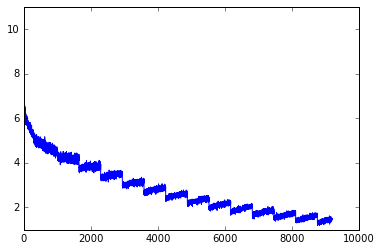

A: no , stanley , it's monday morning . you have to go to school .
B: i'm sorry , son , but i will help you with it ! i'd love to that last time will ya fight me ? ! this is a world ! an evil monster wants to colorado his penis is for !
B true: it's monday ?
9225 iterations...
9250 iterations...
9275 iterations...
9300 iterations...


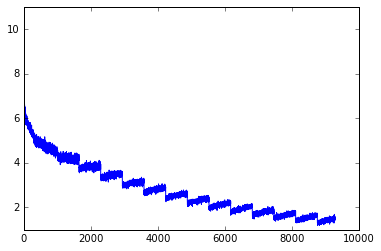

A: i've got a surprise for you too , randy .
B: oooh , cartman . this thing doesn't say it was like a goin' , too . , don't worry , marsh . i'm gonna have to tell you what's gonna be .
B true: oh yeah ? what's that ?
9325 iterations...
9350 iterations...
9375 iterations...
9400 iterations...


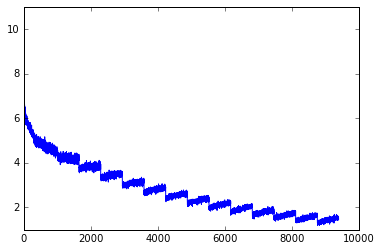

A: kyle , what are you doing here ?
B: nothing more than nothing happened . it gets my period was my new hallway friends . that we'd like to be a new thing . i took her
B true: i'm going to new york to kill the
beginning new loop...
9425 iterations...
9450 iterations...
9475 iterations...
9500 iterations...


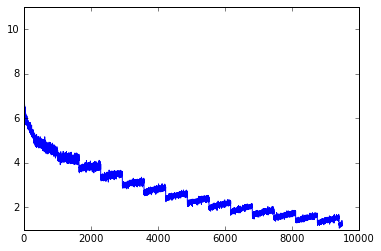

A: okay , okay .
B: okay . okay , now how about you money , kyle ? that i wanna thank you for kyle today . ,
B true: hey hey hey . what's goin' on , rudy ?
9525 iterations...
9550 iterations...
9575 iterations...
9600 iterations...


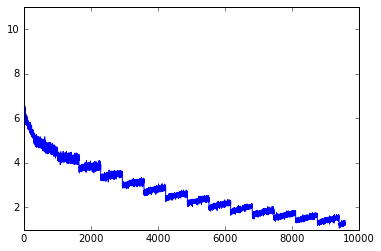

A: this little boy lost his mom .
B: okay , that's butters , isn't that it ? the famous and stand up with the case definitely like , by it ? , okay , and
B true: she said to wait for her by the . . . plastic boxes if i got lost .
9625 iterations...
9650 iterations...
9675 iterations...
9700 iterations...


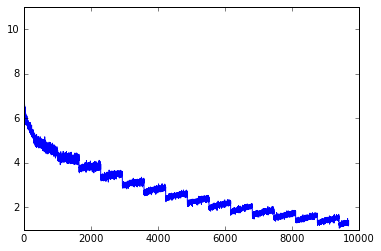

A: mayor , some adorable children are here to see you .
B: meugh . what do we do ? the day come on your little friend , thanks ? , even try . the train of us .
B true: meugh . send them in .
9725 iterations...
9750 iterations...
9775 iterations...
9800 iterations...


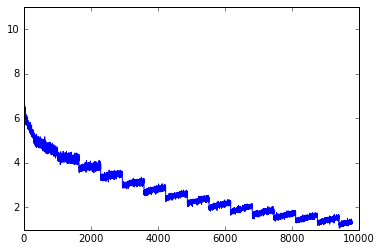

A: boys ! boys ! come on ! there's a sale down in express for men !
B: buddha ! ! hey ! . ! ! win ! ! ! ! ! ! ! . ! ! for us ! so !
B true: oh my god !
9825 iterations...
9850 iterations...
9875 iterations...
9900 iterations...


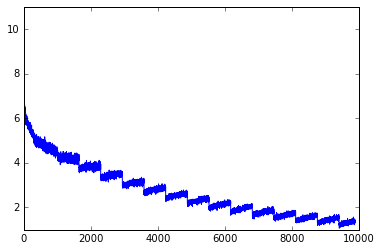

A: oh my goodness , are you two enemies ?
B: por favor , ehe , i might have seen the word by trying to get the balls into a house . another idea trying to make another house
B true: no , we're friends .
9925 iterations...
9950 iterations...
9975 iterations...
10000 iterations...


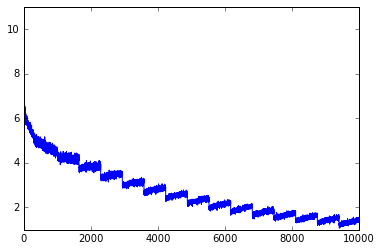

A: los angeles . okay , uh i have a two o'clock flight . that would beee . . . $ 400 each .
B: how aids is you ta , sir ? we have to see we all right up . right right . we have to practice . right on right . well sir . you right
B true: ah , sir , you don't understand . we have to see magic johnson right away . you see , we have aids .
10025 iterations...
10050 iterations...
beginning new loop...
10075 iterations...
10100 iterations...


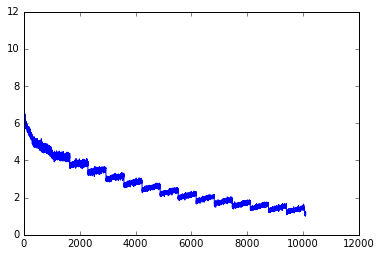

A: well of course he does ; in your screwed - up little head he's the only friend you have .
B: oh . uh - uh i wanna see what's it . come on , it's be stupid . you can eat fun if it is . ,
B true: howdy - ho .
10125 iterations...
10150 iterations...
10175 iterations...
10200 iterations...


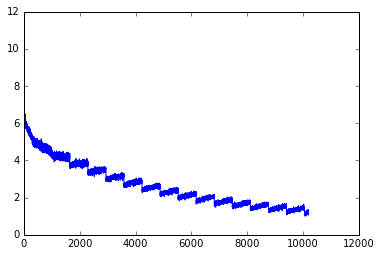

A: uh oh , looks like you've got 'em .
B: you stupid call ! what are you doing now ? ! is that , you ! ! you have no idea , you can't just say they have to kill me ! ,
B true: what ?
10225 iterations...
10250 iterations...
10275 iterations...
10300 iterations...


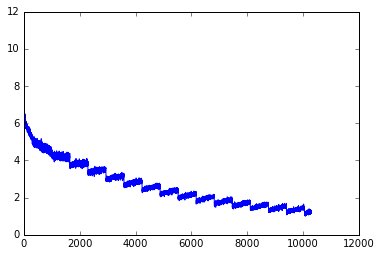

A: the address here is 260 avenue de los mexicanos ?
B: no , you're done it . something's wrong . they've in town together . terrorists and terrorists have another entire map . the quick see they've got the .
B true: oh , come on , don't give me a ticket !
10325 iterations...
10350 iterations...
10375 iterations...
10400 iterations...


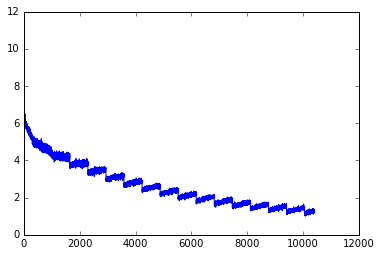

A: look what she did to my fuckin' eye .
B: so the jonas of this whole one way ? it just , i this .
B true: i'll do it again !
10425 iterations...
10450 iterations...
10475 iterations...
10500 iterations...


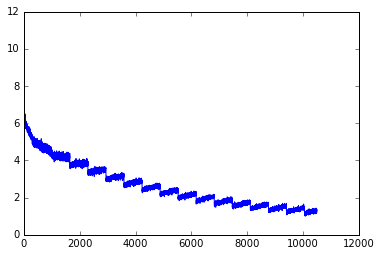

A: ( hehe , yeah , heh )
B: says , that's why cartman's little brother's gonna spend the way to make sure well be a little sick of chef . that i'm . . . i'm just
B true: oh . . . hey there .
10525 iterations...
10550 iterations...
10575 iterations...
10600 iterations...


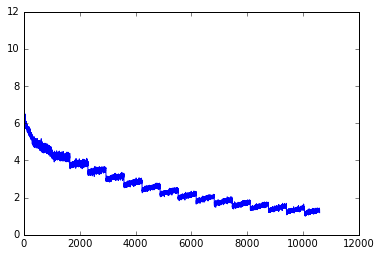

A: hey dudes .
B: well , hey , did you know that ? why it's the great way ? just . . . wait , you just . . . have you up , okay ?
B true: skyler , what are you doing here ? !
10625 iterations...
10650 iterations...
10675 iterations...
10700 iterations...


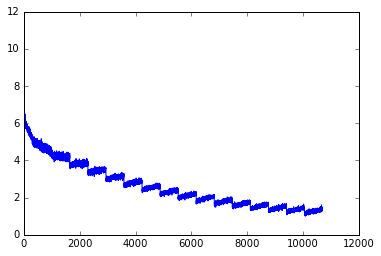

A: i had just given him tree - fitty the week before .
B: hahahahahahahahaaa . . . ike ? , mr . alien . . . dollars . . , bad idea . he can be the alien word at any terrorist
B true: what ? ! you gave that monster another damn tree - fitty ? !
beginning new loop...
10725 iterations...
10750 iterations...
10775 iterations...
10800 iterations...


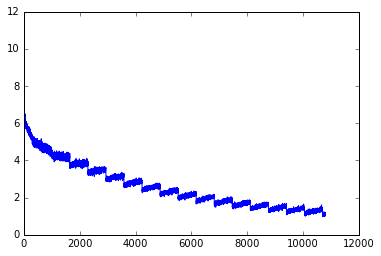

A: eww !
B: attention , wendy . uh when i say " it is " " , when i was a good mom , i myself . "
B true: look , can you guys just get down to business so we can go find my little brother ?
10825 iterations...
10850 iterations...
10875 iterations...
10900 iterations...


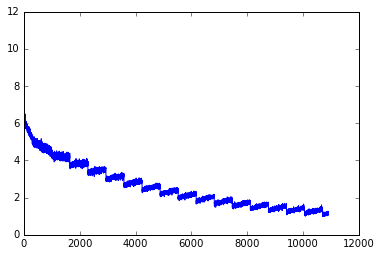

A: you're wearing a bracelet to think of me ?
B: really ? me ? that stuff ? . ! , some of the really bad idea . this time is totally nice . he done is anything
B true: oh i'm not the only one . there's lost of people doin' it .
10925 iterations...
10950 iterations...
10975 iterations...
11000 iterations...


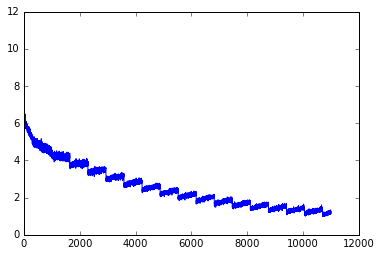

A: don't try and stop me , stan ! you don't know how it feels to be a deformed monstrosity !
B: yes , i tell you , you know . it gives me a few operation . that way , a lot of ,
B true: the list was a forgery , kyle !
11025 iterations...
11050 iterations...
11075 iterations...
11100 iterations...


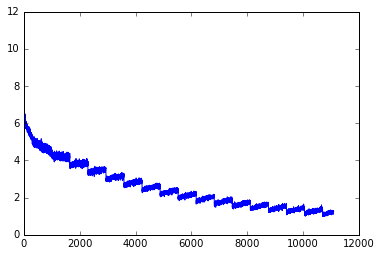

A: that grandma is not a bad piece of ass .
B: grab him . this week . it's true . , we're getting married you tried , m'kay . your purpose ,
B true: ew , dad ! not in front of stanley !
11125 iterations...
11150 iterations...
11175 iterations...
11200 iterations...


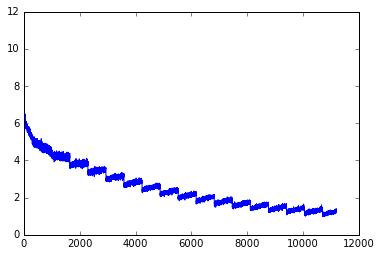

A: chef ! what would a priest want to stick up my butt ?
B: it's your alien . . . i'm alive . of alive . these people were just alive at my time with as as
B true: good - bah !
11225 iterations...
11250 iterations...
11275 iterations...
11300 iterations...


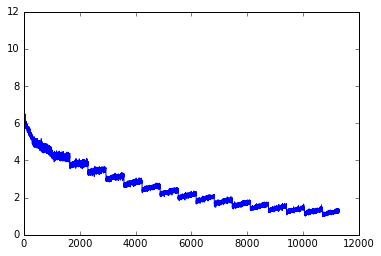

A: no , saddam ! i won't be needing this !
B: teeheehee . let me sing you . . . . . . . . . . . . . . . .
B true: d'oh , i know you won't . but just keep it , just in case . it was good seeing you again , satan . goodnight .
11325 iterations...
11350 iterations...
beginning new loop...
11375 iterations...
11400 iterations...


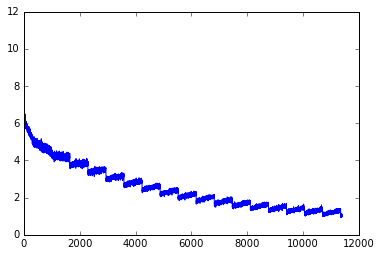

A: no ,
B: oooo , this is hopeless ! and i saw a little arrow , that's how who's the going turn inside for society . they got being very hot , and to line on
B true: well , your mom and i don't get out much , so you'll just have to bear through it .
11425 iterations...
11450 iterations...
11475 iterations...
11500 iterations...


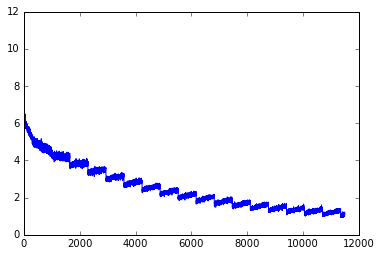

A: something has to be done .
B: we've found the best - life - but - o - on - - - - - - - - . " - - - - . - - . - - . - - - - - -
B true: we've got to stop this -
11525 iterations...
11550 iterations...
11575 iterations...
11600 iterations...


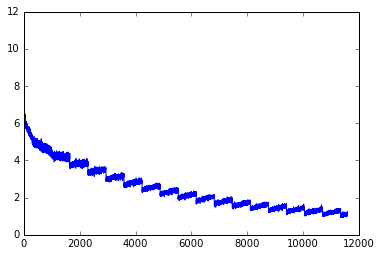

A: butters , you saw ! tell them what happened !
B: there , did you start ? ! that i double - ass ! - eh , my mom , eh well well me said me take me out of .
B true: u - ah , gee - whiz , trent . ah , i don't wanna get involved . or else my parents will ground me .
11625 iterations...
11650 iterations...
11675 iterations...
11700 iterations...


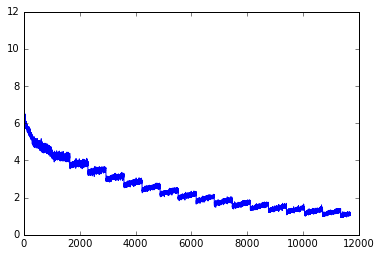

A: but eric , meow meow , you knew the wife of the smartest man in history .
B: hah . more . soon come on my buzzers . butters in the time . more money . time me start , okay . .
B true: who ?
11725 iterations...
11750 iterations...
11775 iterations...
11800 iterations...


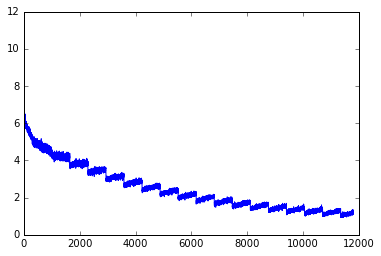

A: sir , it's possible that he
B: hello there , steve , are you gonna try to see us ? ? , normal ? , one of your bad , .
B true: to hell with you ! i'm never gonna frame an innocent man again ! unless i
11825 iterations...
11850 iterations...
11875 iterations...
11900 iterations...


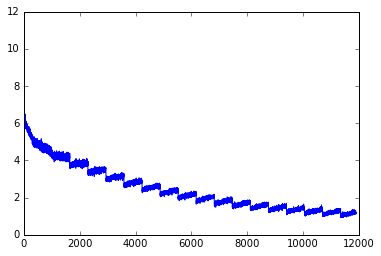

A: see , that's probably the gluten talkin' , uhkay ? if you cut out gluten , you don't ever get pissed off .
B: well you told me about the birthday that club will work . ya ? , it is a big big cause of it , you need to learn everything ,
B true: really ? mwell i might just give this gluten - free thing a try . how does it work ?
11925 iterations...
11950 iterations...
11975 iterations...
beginning new loop...
12000 iterations...


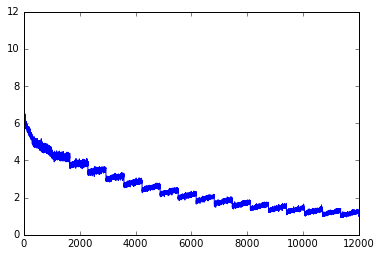

A: oh , neato !
B: aha , i'm weird ! , i'm gonna be a competition ! i'm gonna get the chicken . , i'm gonna go talk to
B true: and now , officer , from this moment on , you will think that you are elvis presley .
12025 iterations...
12050 iterations...
12075 iterations...
12100 iterations...


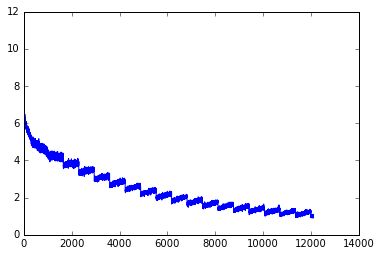

A: well , thanks for your time sir . you might wanna keep the lights on in your yard tonight in case someone tries to build a cabin on it
B: so that's a pretty hard time , mr . things i'm gonna get out here . i'm gonna tell the woman or something , eric . , uh
B true: will do , officer . will . . . do . . .
12125 iterations...
12150 iterations...
12175 iterations...
12200 iterations...


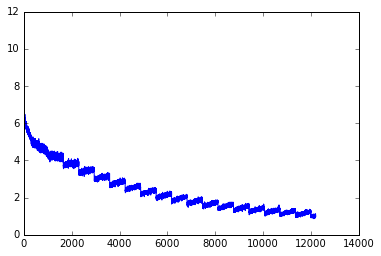

A: nnnooo .
B: no , my , my shit on me . my manh is no eric anymore . we're all here to do . it . , come on , .
B true: no , my , my shit be packing , manh .
12225 iterations...
12250 iterations...
12275 iterations...
12300 iterations...


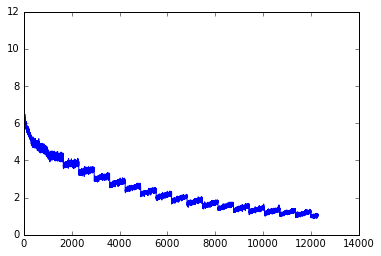

A: is your mom always like that dude ?
B: is very funny . mackey , it's a game when it's on a hard time , but only to see you .
B true: look , could you guys just not say anything about this in school , please ?
12325 iterations...
12875 iterations...
12900 iterations...


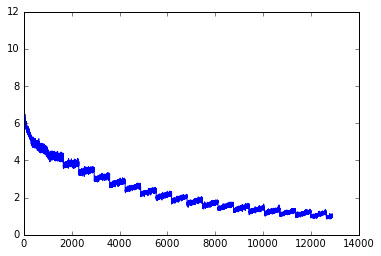

A: truly a night of magic as we're set for the biggest concert event of the year !
B: get out ! i can make the perfect child better write ! i have my video ! , i'm i still will , you know , the ?
B true: in about ten minutes , the jonas brothers are going to take the stage in what disney is calling " the most pure and innocent rock event of the
12925 iterations...
12950 iterations...
12975 iterations...
13000 iterations...


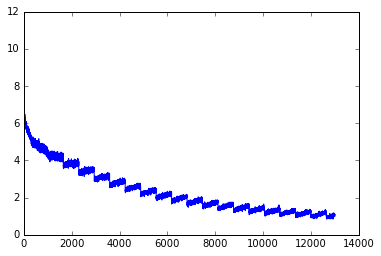

A: say , what's the matter ? you kids look kind of glum .
B: man , this is stop ! we stop ! please . this shit ! for three ! . !
B true: somebody took my dead grandma .
13025 iterations...
13050 iterations...
13075 iterations...
13100 iterations...


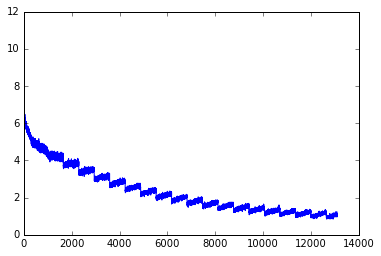

A: oh , jesus , not peta again .
B: hello everyone . there , now come on in the back of the " , uh , see , now , the part of on
B true: cows are maimed and slaughtered and used as a commodity !
13125 iterations...
13150 iterations...
13175 iterations...
13200 iterations...


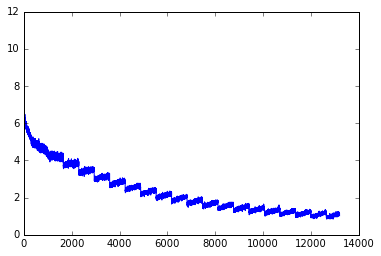

A: oh , poor kid .
B: here , look . my turkey must be all . my friend am i . - excuse me . - - - " ,
B true: you see , my father worked for a newspaper in my native country of denmark . his newspaper showed an image of mohammad and , two days later ,
13225 iterations...
13250 iterations...


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for _ in range(n_epochs):
    for b_x,b_y in iterate_minibatches([prev_phrases,reference_answers],batch_size,shuffle=True):
        ce.append(model.train_fun(b_x,b_y))
        
        epoch_counter +=1
        
        if epoch_counter %25==0:
            print epoch_counter,'iterations...'
        if epoch_counter %100==0:
            plt.plot(ce);plt.show()
            ph =preproc.ix_to_phrase(b_x[0])
            print 'A:', ph
            print 'B:', model.reply(ph)
            print 'B true:',preproc.ix_to_phrase(b_y[0])

    print "beginning new loop..."
        